<a href="https://colab.research.google.com/github/jovevskaaleksandra/data-analysis-of-testing-results/blob/main/181074_VNP_proekt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Патека до фајлот во Google Drive
file_path = '/content/drive/MyDrive/VNP/CY08MSP_STU_QQQ.SAS7BDAT'

In [3]:
!pip install pandas
!pip install pyreadstat

import pandas as pd
import pyreadstat

In [4]:
# Вчитување само на првите 1000 редови за брз преглед
df_sample, meta = pyreadstat.read_sas7bdat(file_path, row_limit=1000)

In [5]:
# Прикажи првите 5 реда
df_sample.head()

,CNT,CNTRYID,CNTSCHID,CNTSTUID,CYC,NatCen,STRATUM,SUBNATIO,REGION,OECD,...,PV3MPRE,PV4MPRE,PV5MPRE,PV6MPRE,PV7MPRE,PV8MPRE,PV9MPRE,PV10MPRE,SENWT,VER_DAT
0,ALB,8.0,800282.0,800001.0,08MS,000800,ALB03,0080000,800.0,0.0,...,226.250,203.029,219.817,331.017,223.752,305.671,230.156,289.436,0.55561,03MAY23:10:11:25
1,ALB,8.0,800115.0,800002.0,08MS,000800,ALB03,0080000,800.0,0.0,...,298.644,321.405,320.452,284.836,364.565,304.044,347.626,352.269,0.76431,03MAY23:10:11:25
2,ALB,8.0,800242.0,800003.0,08MS,000800,ALB01,0080000,800.0,0.0,...,383.340,376.019,285.901,289.896,338.469,316.296,324.361,343.351,1.37877,03MAY23:10:11:25
3,ALB,8.0,800245.0,800005.0,08MS,000800,ALB08,0080000,800.0,0.0,...,264.532,303.422,327.793,165.575,246.156,238.322,275.860,227.466,1.49361,03MAY23:10:11:26
4,ALB,8.0,800285.0,800006.0,08MS,000800,ALB03,0080000,800.0,0.0,...,399.300,514.739,539.850,461.793,514.465,510.462,490.537,503.793,0.65249,03MAY23:10:11:26


In [7]:
df_sample.columns

Index(['CNT', 'CNTRYID', 'CNTSCHID', 'CNTSTUID', 'CYC', 'NatCen', 'STRATUM',
       'SUBNATIO', 'REGION', 'OECD',
       ...
       'PV3MPRE', 'PV4MPRE', 'PV5MPRE', 'PV6MPRE', 'PV7MPRE', 'PV8MPRE',
       'PV9MPRE', 'PV10MPRE', 'SENWT', 'VER_DAT'],
      dtype='object', length=1278)

In [12]:
# Ги избирам имињата на колоните што содржат клучни зборови:
# 'MATH' → резултати по математика
# 'READ' → резултати по читање
# 'SCIE' → резултати по наука
# 'ST004' → пол (gender)
# 'ESCS' → социо-економски статус
selected_columns = [col for col in df_sample.columns if 'MATH' in col or 'READ' in col or 'SCIE' in col or 'ST004' in col or 'ESCS' in col]

# Ги прикажувам имињата на избраните колони за да видиме дали сè е во ред
selected_columns

['ST004D01T',
 'MATHPREF',
 'MATHEASE',
 'MATHMOT',
 'MATHEFF',
 'MATHEF21',
 'MATHPERS',
 'ESCS',
 'PV1MATH',
 'PV2MATH',
 'PV3MATH',
 'PV4MATH',
 'PV5MATH',
 'PV6MATH',
 'PV7MATH',
 'PV8MATH',
 'PV9MATH',
 'PV10MATH',
 'PV1READ',
 'PV2READ',
 'PV3READ',
 'PV4READ',
 'PV5READ',
 'PV6READ',
 'PV7READ',
 'PV8READ',
 'PV9READ',
 'PV10READ',
 'PV1SCIE',
 'PV2SCIE',
 'PV3SCIE',
 'PV4SCIE',
 'PV5SCIE',
 'PV6SCIE',
 'PV7SCIE',
 'PV8SCIE',
 'PV9SCIE',
 'PV10SCIE']

In [13]:
# Го вчитувам оригиналниот .sas7bdat фајл, но само со избраните колони
# Така го забрзувам вчитувањето и трошам помалку меморија
df, meta = pyreadstat.read_sas7bdat(file_path, usecols=selected_columns)


In [14]:
# Го прикажувам почетокот на табелата (првите 5 реда)
df.head()


,ST004D01T,MATHPREF,MATHEASE,MATHMOT,MATHEFF,MATHEF21,MATHPERS,ESCS,PV1MATH,PV2MATH,...,PV1SCIE,PV2SCIE,PV3SCIE,PV4SCIE,PV5SCIE,PV6SCIE,PV7SCIE,PV8SCIE,PV9SCIE,PV10SCIE
0,1.0,0.0,0.0,0.0,-1.4413,NaN,-0.0085,1.1112,179.583,201.334,...,335.468,295.861,312.648,263.027,263.343,308.478,309.256,273.810,297.433,353.279
1,2.0,NaN,NaN,NaN,NaN,NaN,NaN,-3.0507,308.247,304.444,...,315.021,327.293,280.396,270.154,348.569,320.866,275.114,319.327,258.910,319.664
2,2.0,NaN,NaN,NaN,NaN,NaN,NaN,-0.1867,267.514,343.743,...,358.675,344.639,328.467,328.270,309.492,333.690,339.446,290.172,291.706,311.935
3,1.0,0.0,0.0,0.0,-1.3156,2.2322,-0.2546,-3.2198,272.649,300.642,...,214.823,192.366,183.866,163.129,280.386,229.360,197.635,199.556,246.714,193.667
4,1.0,0.0,0.0,0.0,-0.5867,0.9425,-0.1735,-1.0548,435.473,491.174,...,434.997,565.771,417.831,508.182,472.252,425.544,489.097,489.592,388.947,475.359


In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Гледам какви вредности има во колоната за пол (ST004D01T)
#    за да се осигурам дека се правилно запишани
df['ST004D01T'].value_counts()


,count
ST004D01T,
2.0,307906
1.0,305759


In [18]:
# Прикажи уникатни вредности во колоната ST004D01T за да видиш што има во неа
df['ST004D01T'].unique()

array([ 1.,  2., nan])

In [23]:
# Претворање на бројки во текстуални вредности
df['gender'] = df['ST004D01T'].map({1.0: 'Машко', 2.0: 'Женско'})

# Замена на NaN вредности со 'Не познато'
df['gender'] = df['gender'].fillna('Непознато')

# Прегледај ги првите неколку редови за да видиш како изгледа новата колона
df[['ST004D01T', 'gender']].head()



,ST004D01T,gender
0,1.0,Машко
1,2.0,Женско
2,2.0,Женско
3,1.0,Машко
4,1.0,Машко


In [24]:
# Проверка на типот на податоци во колоната
df['gender'].dtype
# Треба да е dtype('0') - тоа е за текстуални стринг податоци

dtype('O')

In [25]:
# Проверка на уникатни вредности во колоната 'gender'
df['gender'].unique()
# треба да има вредности Машко, Женско и Непознато

array(['Машко', 'Женско', 'Непознато'], dtype=object)

In [26]:
# Проверка дали сите вредности во колоната се стрингови
all(df['gender'].apply(lambda x: isinstance(x, str)))
# Треба да врати true ако се сите вредности стрингови

True

In [28]:
# Групирам по пол и пресметувам просечни резултати по предмет
average_scores_by_gender = df.groupby('gender')[['PV1MATH', 'PV1READ', 'PV1SCIE']].mean()

# Прикажи ги просечните резултати
average_scores_by_gender

# Објаснување:
# groupby('gender'): Групира податоците по новата колона gender.
# [['PV1MATH', 'PV1READ', 'PV1SCIE']]: Селектира предмети (математика, читање, наука).
# .mean(): Пресметува просечни резултати по групи (по пол).

,PV1MATH,PV1READ,PV1SCIE
gender,,,
Женско,443.664623,425.748769,449.202565
Машко,438.054647,450.761457,451.709571
Непознато,481.395114,541.973582,534.144329


In [30]:
# Испечати ги просечните резултати
print(average_scores_by_gender)

              PV1MATH     PV1READ     PV1SCIE
gender                                       
Женско     443.664623  425.748769  449.202565
Машко      438.054647  450.761457  451.709571
Непознато  481.395114  541.973582  534.144329


In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
%matplotlib inline

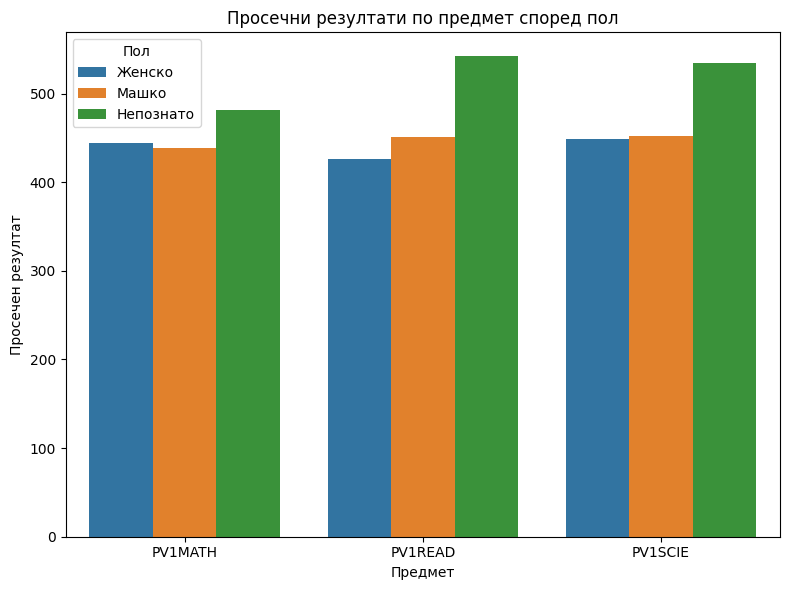

In [33]:
# Преобликувам податоците за визуелизација
avg_scores = average_scores_by_gender.reset_index().melt(id_vars='gender', var_name='Предмет', value_name='Просек')

# Поставување на големина на графикот
plt.figure(figsize=(8, 6))

# Креирам barplot
sns.barplot(data=avg_scores, x='Предмет', y='Просек', hue='gender')

# Додавам наслов и ознаки
plt.title('Просечни резултати по предмет според пол')
plt.xlabel('Предмет')
plt.ylabel('Просечен резултат')

# Поставување на легенда
plt.legend(title='Пол')

# Покажување на графикот
plt.tight_layout()
plt.show()


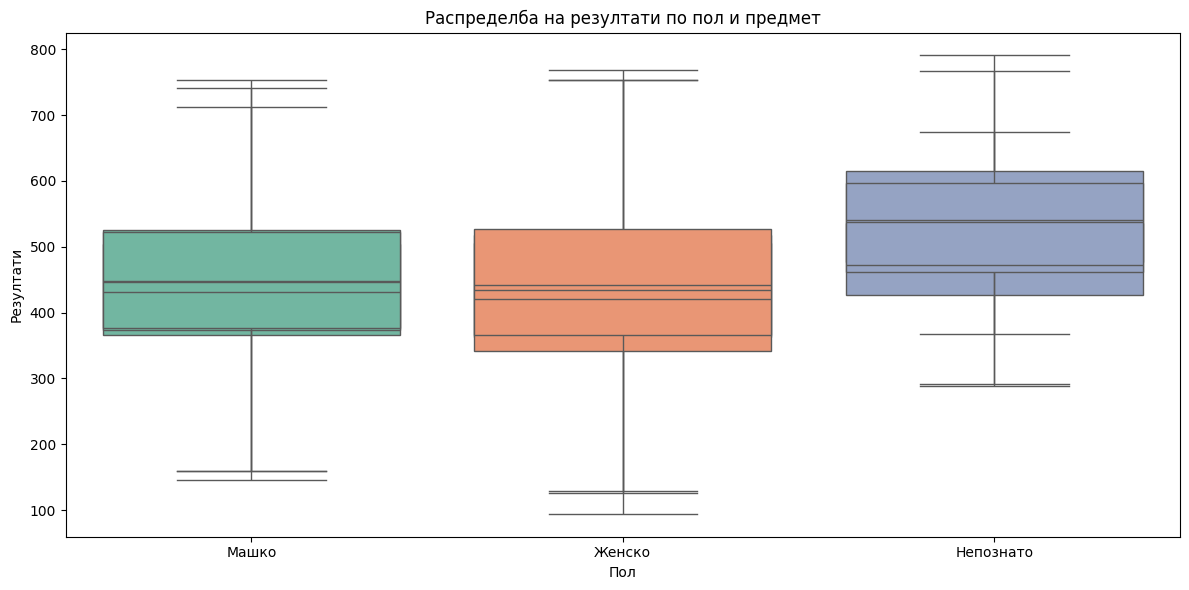

In [36]:
# Boxplot за распределба на резултати по пол и предмет
plt.figure(figsize=(12, 6))

# Математика
sns.boxplot(data=df, x='gender', y='PV1MATH', hue='gender', palette='Set2', showfliers=False)
# Читање
sns.boxplot(data=df, x='gender', y='PV1READ', hue='gender', palette='Set2', showfliers=False)
# Наука
sns.boxplot(data=df, x='gender', y='PV1SCIE', hue='gender', palette='Set2', showfliers=False)

plt.title('Распределба на резултати по пол и предмет')
plt.xlabel('Пол')
plt.ylabel('Резултати')
plt.tight_layout()
plt.show()

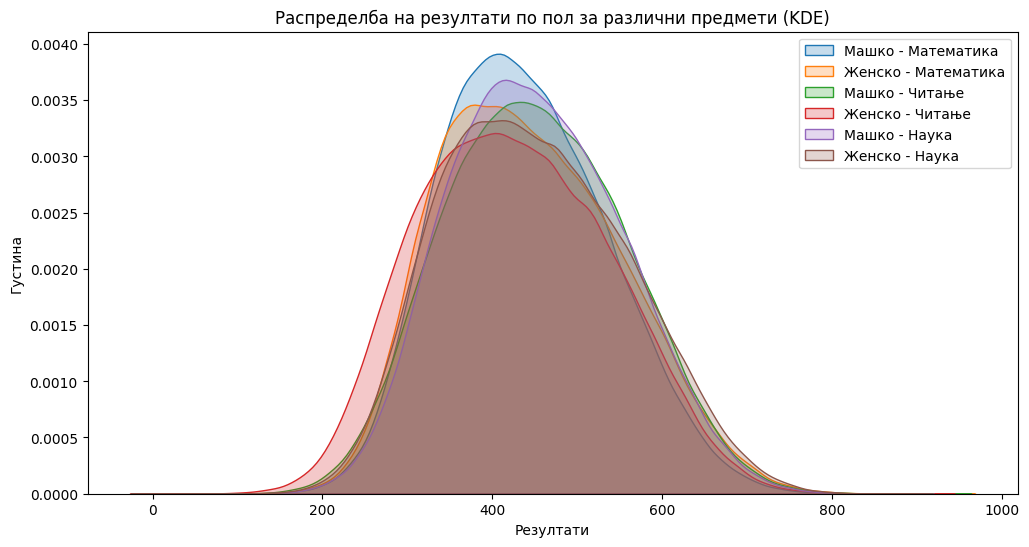

In [38]:
# KDE за распределба по пол за Математика, Читање и Наука
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df[df['gender'] == 'Машко'], x='PV1MATH', label='Машко - Математика', fill=True)
sns.kdeplot(data=df[df['gender'] == 'Женско'], x='PV1MATH', label='Женско - Математика', fill=True)
sns.kdeplot(data=df[df['gender'] == 'Машко'], x='PV1READ', label='Машко - Читање', fill=True)
sns.kdeplot(data=df[df['gender'] == 'Женско'], x='PV1READ', label='Женско - Читање', fill=True)
sns.kdeplot(data=df[df['gender'] == 'Машко'], x='PV1SCIE', label='Машко - Наука', fill=True)
sns.kdeplot(data=df[df['gender'] == 'Женско'], x='PV1SCIE', label='Женско - Наука', fill=True)

plt.title('Распределба на резултати по пол за различни предмети (KDE)')
plt.xlabel('Резултати')
plt.ylabel('Густина')
plt.legend()
plt.show()

In [39]:
# Провери колку недостасувачки податоци има по колона
missing_values = df.isnull().sum()
print(missing_values)

ST004D01T        79
MATHPREF     104594
MATHEASE     107262
MATHMOT      107205
MATHEFF      144231
MATHEF21     126324
MATHPERS     111136
ESCS          25468
PV1MATH           0
PV2MATH           0
PV3MATH           0
PV4MATH           0
PV5MATH           0
PV6MATH           0
PV7MATH           0
PV8MATH           0
PV9MATH           0
PV10MATH          0
PV1READ           0
PV2READ           0
PV3READ           0
PV4READ           0
PV5READ           0
PV6READ           0
PV7READ           0
PV8READ           0
PV9READ           0
PV10READ          0
PV1SCIE           0
PV2SCIE           0
PV3SCIE           0
PV4SCIE           0
PV5SCIE           0
PV6SCIE           0
PV7SCIE           0
PV8SCIE           0
PV9SCIE           0
PV10SCIE          0
gender            0
dtype: int64


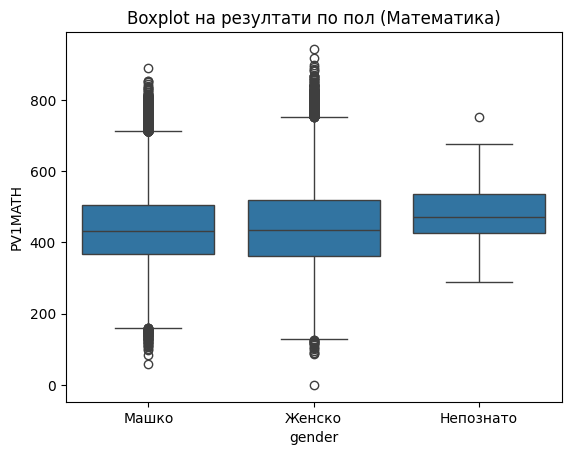

In [40]:
# Проверка на outliers
sns.boxplot(data=df, x='gender', y='PV1MATH')
plt.title('Boxplot на резултати по пол (Математика)')
plt.show()
